
Proyek Analisis Data: Nama dataset
    Nama: Louise Derizhy
    Email: nikolarevata@gmail.com
    Id Dicoding: louise_derizhy


Menentukan Pertanyaan Bisnis
1. Bagaimana perbandingan jumlah rental sepeda antara pengguna casual dan registered setiap musimnya?
2. Bagaimana perbandingan jumlah rental ketika hari kerja dengan akhir pekan dan hari libur? 



Menyiapkan semua library yang dibutuhkan

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

Data Wrangling

Gathering Data

In [155]:
hourDf = pd.read_csv('dataset/hour.csv')
dayDf = pd.read_csv('dataset/day.csv')

Assessing Data

In [156]:
hourDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [157]:

dayDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek Data NaN dan Null

In [158]:
hourDf.isnull().sum()
hourDf.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [159]:
dayDf.isnull().sum()
dayDf.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek Duplikasi

In [160]:
hourDf.duplicated().sum()

0

In [161]:
dayDf.duplicated().sum()

0

Cleaning Data

Ubah Kolom dteday ke Tipe Data Datetime

In [162]:
dayDf["dteday"] = pd.to_datetime(dayDf["dteday"])
hourDf["dteday"] = pd.to_datetime(hourDf["dteday"])

Exploratory Data Analysis (EDA)

In [163]:
from collections import defaultdict
hourDf2 = defaultdict(int)
dayDf2 = defaultdict(int)

wantedColumns = ["season", "casual", "registered"]
for i in wantedColumns:
    hourDf2[i] = hourDf[i]
    dayDf2[i] = dayDf[i]
    
hourDf2 = pd.DataFrame(hourDf2)
dayDf2 = pd.DataFrame(dayDf2)

casualDf = dayDf2.groupby("season").casual.sum().reset_index()
registeredDf = dayDf2.groupby("season").registered.sum().reset_index()

casualDf2 = hourDf2.groupby("season").casual.sum().reset_index()
registeredDf2 = hourDf2.groupby("season").registered.sum().reset_index()

no1Df = pd.merge(
    left = casualDf,
    right = registeredDf,
    how = "inner",
    on = "season"
)

no1Df2 = pd.merge(
    left = casualDf2,
    right = registeredDf2,
    how = "inner",
    on = "season"
)

no1Df

,season,casual,registered
0,1,60622,410726
1,2,203522,715067
2,3,226091,835038
3,4,129782,711831


In [164]:
no1Df2

,season,casual,registered
0,1,60622,410726
1,2,203522,715067
2,3,226091,835038
3,4,129782,711831


Disimpulkan bahwa hourDf merupakan penjabaran dari dayDf sehingga memiliki jumlah total yang sama.
Untuk ke depannya hanya akan menggunakan dayDf

In [165]:
no1Df

,season,casual,registered
0,1,60622,410726
1,2,203522,715067
2,3,226091,835038
3,4,129782,711831


Kita juga dapat mengetahui perbandingan jumlah rental user casual dan registered setiap musimnya melalui tabel di atas

In [166]:
no2Df = defaultdict(int)

wantedColumns = ["workingday", "cnt"]
for i in wantedColumns:
    no2Df[i] = dayDf[i]
    
no2Df = pd.DataFrame(no2Df)

no2Df = no2Df.groupby("workingday").cnt.sum().reset_index()
no2Df["workingday"] = no2Df["workingday"].apply(str)

no2Df.replace("0", "Non-Workingday", inplace=True)
no2Df.replace("1", "Workingday", inplace=True)

no2Df

,workingday,cnt
0,Non-Workingday,1000269
1,Workingday,2292410


Dari tabel di atas, kita dapat mengetahui jumlah rental sepeda pada hari kerja dan non hari kerja

Visualization & Explanatory Analysis

1. Bagaimana perbandingan jumlah rental sepeda antara pengguna casual dan registered setiap musimnya?

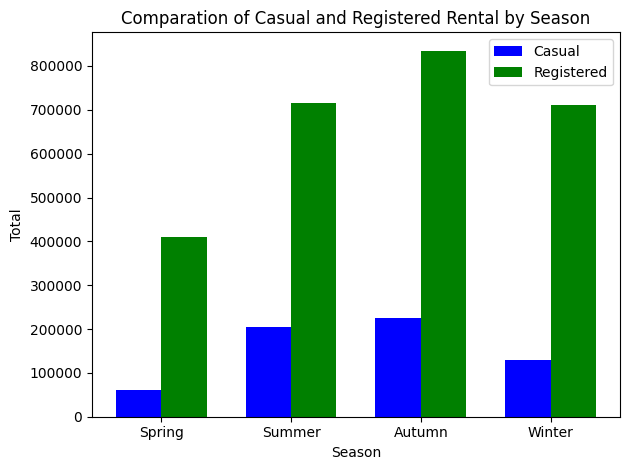

In [167]:
fig, ax = plt.subplots()
bar_width = 0.35

p1 = plt.bar(no1Df["season"], no1Df["casual"], bar_width, color='b', label='Casual')
p2 = plt.bar(no1Df["season"] + bar_width, no1Df["registered"], bar_width, color='g', label='Registered')

plt.xlabel('Season')
plt.ylabel('Total')
plt.title('Comparation of Casual and Registered Rental by Season')
plt.xticks(no1Df["season"] + (bar_width/2) , ("Spring", "Summer", "Autumn", "Winter"))
plt.legend()

plt.tight_layout()
plt.show()

2. Bagaimana perbandingan jumlah rental ketika hari kerja dengan akhir pekan dan hari libur?

Text(0, 0.5, '')

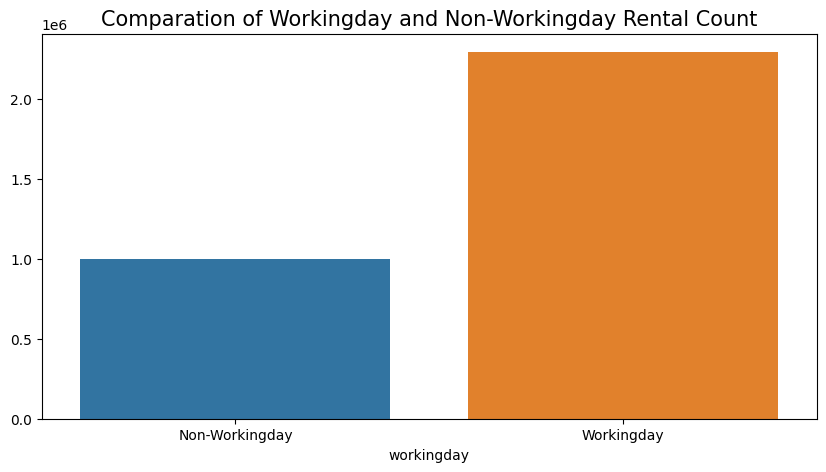

In [168]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y = "cnt", 
    x = "workingday",
    data = no2Df
)

plt.title("Comparation of Workingday and Non-Workingday Rental Count", loc="center", fontsize=15)
plt.ylabel(None)

Conclusion

1.  Bagaimana perbandingan jumlah rental sepeda antara pengguna casual dan registered setiap musimnya?
Jb. Jumlah rental sepeda yang merupakan user yang telah terdaftar lebih banyak daripada user casual setiap musimnya

2.  Bagaimana perbandingan jumlah rental ketika hari kerja dengan akhir pekan dan hari libur?
Jb. Jumlah rental sepeda pada hari bekerja lebih banyak dua kali lipat daripada non hari kerja, namun dengan lebih banyaknya hari kerja membuktikan bahwa angka rental pada non hari kerja cukup tinggi